In [1]:
import os

import numpy as np
import pandas as pd
import tensorflow as tf

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload

2023-12-10 22:03:54.171701: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-10 22:03:54.567182: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-10 22:03:54.567350: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-10 22:03:54.642086: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-10 22:03:54.801208: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-10 22:03:54.804097: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
%autoreload 1

## EDA

In [69]:
%aimport utils.eda
from utils.eda import (extract_image_props_all,
                      get_random_images,
                      show_images,
                      multivariate_grid,
                      plot_average_intensity_histograms)

In [4]:
DIR = './Covid19-dataset'

In [5]:
# Get all images props takes a long time. If img_properties.json exists, load it. If not, generate it and save it.
if os.path.exists('img_properties.json'):
  df_img_props = pd.read_json('img_properties.json')
else:
  df_img_props = extract_image_props_all(DIR)
  df_img_props.to_json('img_properties.json')

df_img_props.head()

,datasplit,path,label,xsize,ysize,br_med,br_std,aspectratio_yx
0,train,./Covid19-dataset/train/Normal/076.jpeg,normal,1952,1600,128,73.910922,0.819672
1,train,./Covid19-dataset/train/Normal/088.jpeg,normal,2148,1600,105,81.950887,0.744879
2,train,./Covid19-dataset/train/Normal/075.jpeg,normal,1917,1432,128,73.699283,0.747001
3,train,./Covid19-dataset/train/Normal/021.jpeg,normal,2271,1827,127,74.570484,0.804491
4,train,./Covid19-dataset/train/Normal/095.jpeg,normal,1647,1314,123,76.653127,0.797814


- ### Size Distribution for all datasets

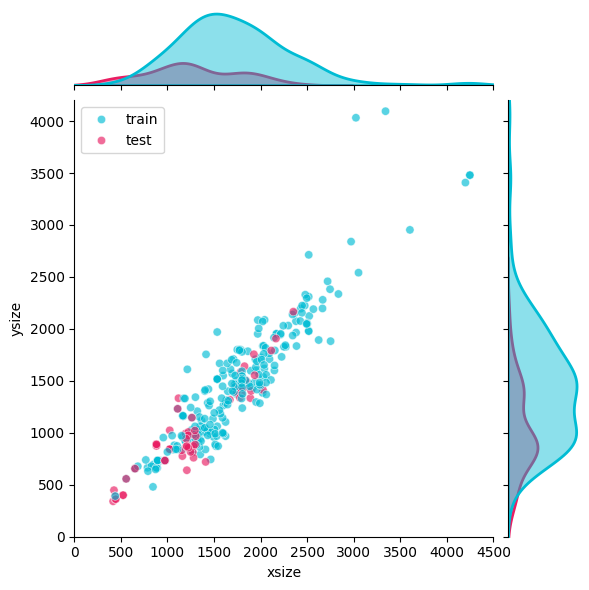

In [6]:
multivariate_grid(df_img_props, 'xsize', 'ysize', lim={'x': (0, 4500), 'y': (0, 4200)})

- ### Aspect ratio distribution

In [7]:
custom_colors = ['#009688', '#00BCD4', '#03A9F4', '#3F51B5', '#673AB7', '#9C27B0', '#E91E63']

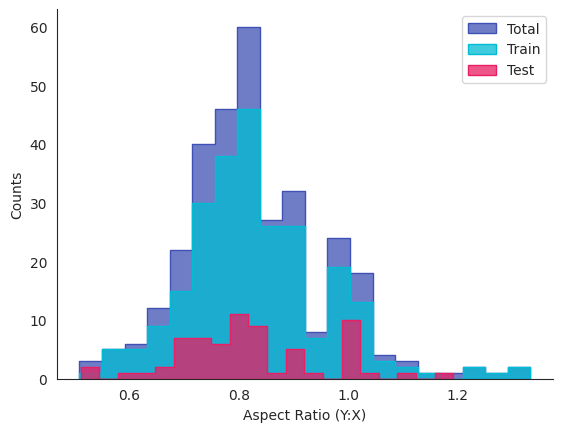

In [8]:
sns.set_style("white")
bins = 20
sns.histplot(df_img_props, x='aspectratio_yx', bins=bins, color=custom_colors[3], element='step', stat='count', common_norm=False, label='Total')
sns.histplot(df_img_props[df_img_props.datasplit == 'train'], x='aspectratio_yx', bins=bins, color=custom_colors[1], element='step', stat='count', common_norm=False, label='Train')
sns.histplot(df_img_props[df_img_props.datasplit == 'test'], x='aspectratio_yx', bins=bins, color=custom_colors[6], element='step', stat='count', common_norm=False, label='Test')

plt.legend()
plt.xlabel('Aspect Ratio (Y:X)')
plt.ylabel('Counts')
sns.despine()

plt.show()


- ### Train-Test split distribution

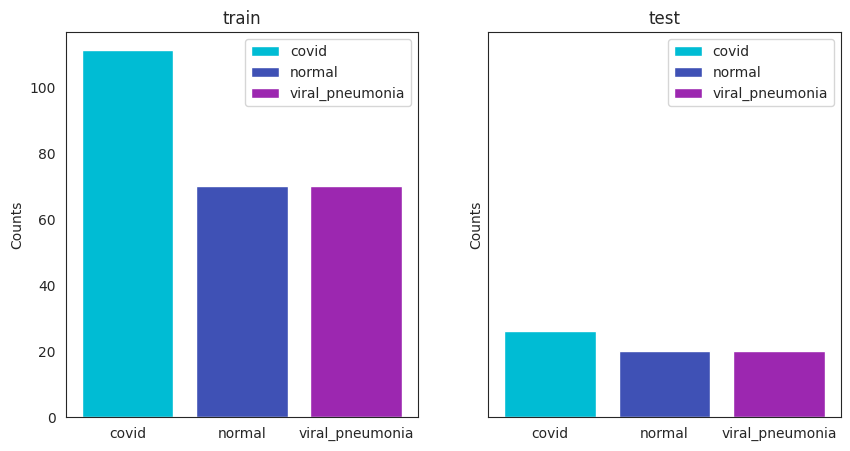

In [9]:
label_colors = {'covid': custom_colors[1], 'normal': custom_colors[3], 'viral_pneumonia': custom_colors[5]}
fig, axes = plt.subplots(nrows=1, ncols=len(df_img_props['datasplit'].unique()), figsize=(10, 5), sharey=True)

for i, datasplit in enumerate(df_img_props['datasplit'].unique()):
    split_data = df_img_props[df_img_props['datasplit'] == datasplit]
    ax = axes[i]
    
    for label, color in label_colors.items():
        label_data = split_data[split_data['label'] == label]
        ax.bar(label, label_data.shape[0], color=color, label=label)

    ax.set_title(datasplit)
    ax.set_ylabel('Counts')
    ax.legend()
    ax.grid(False)

plt.show()


- ### Distribution of median brightnesses

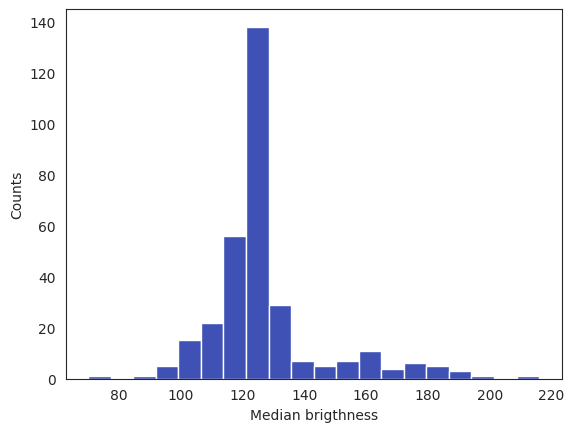

In [10]:
df_img_props.br_med.hist(grid=False, bins=20, color=custom_colors[3])
plt.xlabel('Median brigthness')
plt.ylabel('Counts')
plt.show()

- ### Pixel intensity

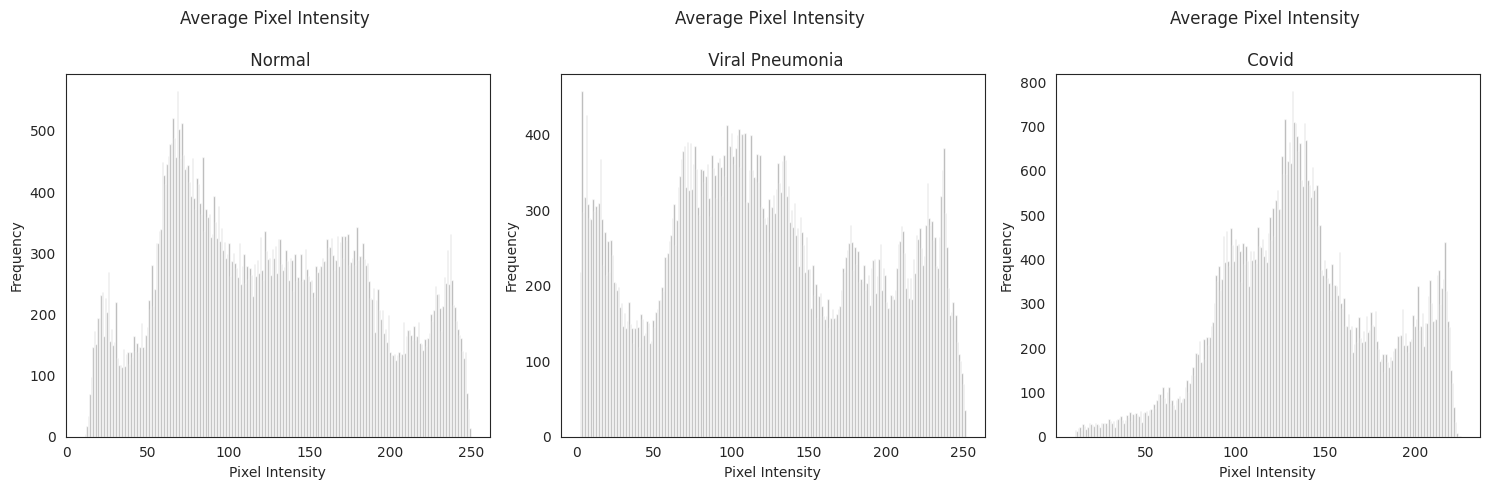

In [71]:
img_paths_lists = get_random_images(df_img_props, 'train', nsize=10)
plot_average_intensity_histograms(img_paths_lists)

- ### Image inspection

TRAIN
	Normal


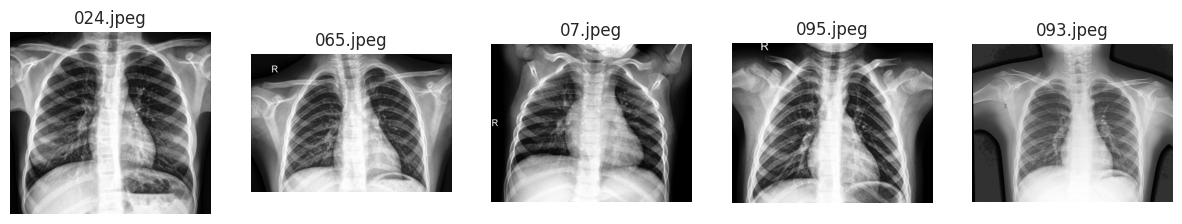

	Viral Pneumonia


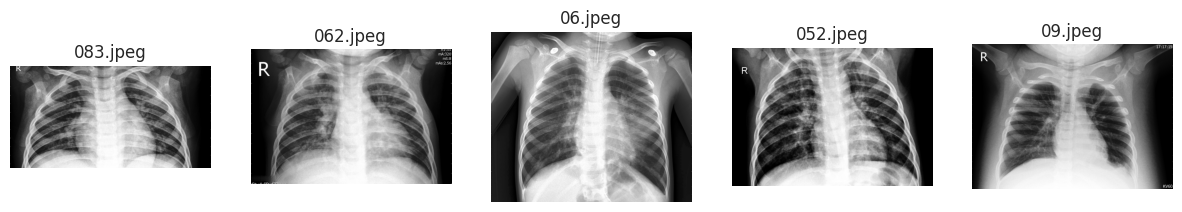

	Covid


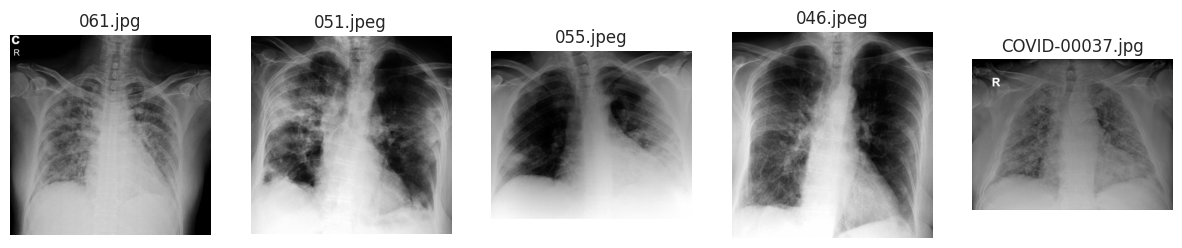

TEST
	Normal


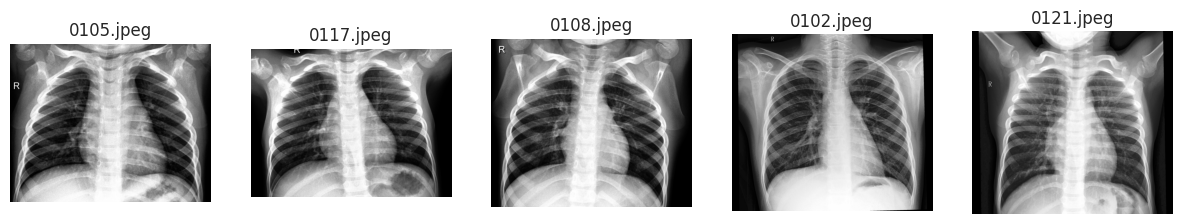

	Viral Pneumonia


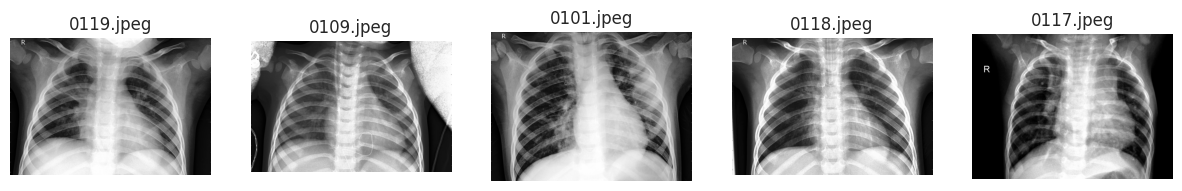

	Covid


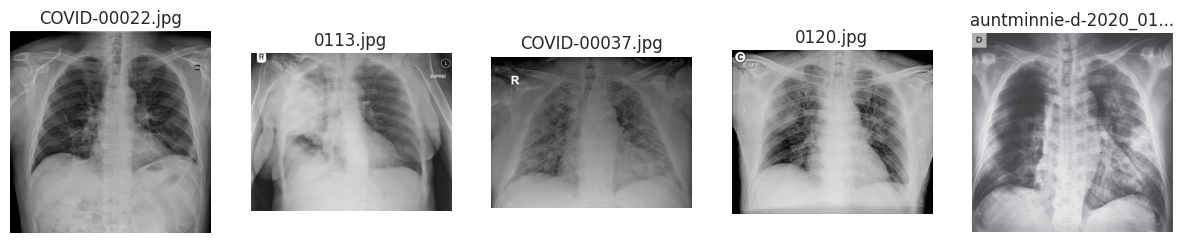

In [11]:
for split in ('train', 'test'):
  norm, pneu, cov = get_random_images(df_img_props, split, nsize=5)
  
  print(split.upper())
  show_images(norm)
  show_images(pneu)
  show_images(cov)